### 2. matplotlib绘图基础

In [3]:
import numpy as np # 加载numpy模块
import matplotlib.pyplot as plt # 加载matplotlib模块
%matplotlib inline 

In [4]:
x = np.linspace(0, 2*3.1415, 100)
y = np.sin(x)

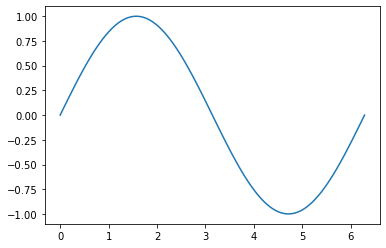

In [6]:
plt.plot(x,y)

In [7]:
max_min_x = np.array([3.1415/2, 3.1415 * 3/2])
max_min_y = np.sin(max_min_x)
x = np.linspace(0, 2*3.1415, 100)
y = np.sin(x)

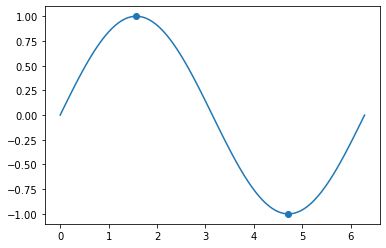

In [8]:
plt.plot(x,y);
plt.scatter(max_min_x,max_min_y);

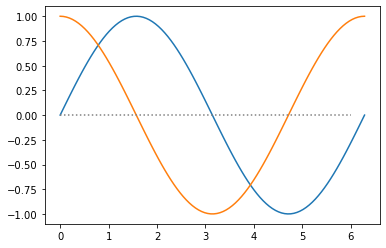

In [9]:
x = np.linspace(0, 2*3.1415, 100)
y1 = np.sin(x)
y2 = np.cos(x)
plt.plot(x,y1)
plt.plot(x,y2)
plt.hlines(0,0,6,linestyles='dotted',color = 'grey');

In [10]:
import  numpy.random as rd
dies = rd.randint(1,7,10000)
def func_count(x):
    result = dict()
    number = np.unique(x)
    for n in number:
        result[n] = x[x == n].size
    return result

dies_output = func_count(dies)

In [11]:
print(dies_output)

{1: 1705, 2: 1684, 3: 1627, 4: 1624, 5: 1697, 6: 1663}


In [12]:
x = [k for k,v in dies_output.items()]
y = [v for k,v in dies_output.items()]

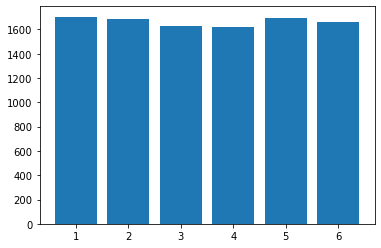

In [13]:
plt.bar(x,y);

In [14]:
die_1 = rd.randint(1,7,10000)
die_2 = rd.randint(1,7,10000)
die_sum = die_1 + die_2
dies_output = func_count(die_sum)
x = [k for k,v in dies_output.items()]
y = [v for k,v in dies_output.items()]

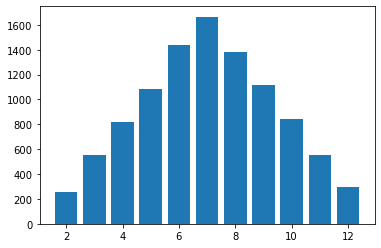

In [15]:
plt.bar(x,y);

### 3. 交互式绘图

In [16]:
import ipywidgets as widgets

In [17]:
def plot_func(freq):
    x = np.linspace(0, 2*3.1415,100)
    y = np.sin(x * freq)
    plt.plot(x, y)

In [18]:
widgets.interact(plot_func,freq=widgets.IntSlider(min=0,max=10,step=1,value=2));

interactive(children=(IntSlider(value=2, description='freq', max=10), Output()), _dom_classes=('widget-interac…

In [19]:
def plot_lines(a,b):
    x = np.linspace(-1,1,100)
    y = a+b*x
    plt.plot(x, y)
    plt.hlines(0,-1,1,linestyles='dotted',color = 'grey')
    plt.vlines(0,-1,1,linestyles='dotted',color = 'grey')
    plt.xlim((-1,1))
    plt.ylim((-1,1))
    plt.show()

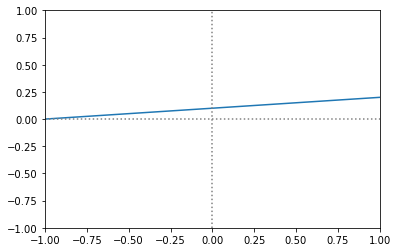

In [20]:
plot_lines(0.1,0.1)

In [21]:
slide1 = widgets.FloatSlider(min=-1,max=1,step=0.1,value=0.1)
slide2 = widgets.FloatSlider(min=-1,max=1,step=0.1,value=0.1)
widgets.interact(plot_lines,a=slide1, b=slide2);

interactive(children=(FloatSlider(value=0.1, description='a', max=1.0, min=-1.0), FloatSlider(value=0.1, descr…

### 练习

In [22]:
def plot_dies(n):
    dies = rd.randint(1,7,[n,10000])
    die_sum = dies.sum(0)
    dies_output = func_count(die_sum)
    x = [k for k,v in dies_output.items()]
    y = [v for k,v in dies_output.items()]
    plt.bar(x, y);

In [23]:
slider = widgets.IntSlider(min=1,max=20,step=1,value=2)
widgets.interact(plot_dies,n=slider);

interactive(children=(IntSlider(value=2, description='n', max=20, min=1), Output()), _dom_classes=('widget-int…

In [24]:
play = widgets.Play(
    value=1,
    min=0,
    max=20,
    step=1
)
slider = widgets.IntSlider(min=1,max=20,step=1,value=2)
widgets.jslink((play, 'value'), (slider, 'value'))
w = widgets.interactive(plot_dies,n=slider)
widgets.VBox([play,w])